# E9 - Task

In [1]:
reset -f

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Elastic pendulum

* dof = 2 -> length of the pendulum & rotation
* reference level for the potential energy is located in the support of the pendulum (horizontal)

## Define symbolic variables

* $t$ - time
* $x$ - global coordinate
* $y$ - gloabal coorinate
* $\phi$ - angle of rotation of the pendulum
* $\lambda$ - length of the spring / the elastic pendulum
* $m$ - point mass at the end of the pendulum
* $c$ - spring stiffness
* $g$ - gravitational acceleration
* $^{\cdot}$ - derivative with respect to time

In [3]:
t, m, c, g, lam0 = sp.symbols('t, m, c, g, \lambda_0', real = 'True')
phi = sp.Function('\phi')
lam = sp.Function('\lambda')

## Position vector

In [4]:
from sympy.vector import CoordSys3D

C = CoordSys3D('C')
r = lam(t)*C.i + 0*C.j + 0*C.k
dr = sp.diff(lam(t),t)*C.i + lam(t)*sp.diff(phi(t),t)*C.j + 0*C.k
absdr = sp.sqrt(dr.dot(dr))

## Equation of motion
using Lagrange's equation of second kind

### Kinetic Energy

In [5]:
T = m/2*absdr**2

### Potential Energy

In [6]:
U = 1/2*c*(lam(t) - lam0)**2 - m*g*lam(t)*sp.cos(phi(t))
U

0.5*c*(-\lambda_0 + \lambda(t))**2 - g*m*\lambda(t)*cos(\phi(t))

### Dissipation Function

In [7]:
d = 0

### General Force

In [8]:
F = 0

### Lagrangian

In [9]:
L = T - U

### Equation of motion
$\left(\frac{\partial L}{\partial \dot{q}(t)} \right)^{\cdot} - \frac{\partial L}{\partial q(t)} = - \frac{\partial d}{\partial \dot{q}(t)} + F \frac{\partial r_F}{\partial q(t)}$

In [10]:
q = lam
EqMo1 = sp.Eq(sp.diff(sp.diff(L, sp.diff(q(t),t)),t) - sp.diff(L, q(t)) +  sp.diff(d, sp.diff(q(t),t)),sp.diff(F,q(t)))
display(EqMo1.simplify())

Eq(1.0*c*(\lambda_0 - \lambda(t)) + g*m*cos(\phi(t)) + m*\lambda(t)*Derivative(\phi(t), t)**2 - m*Derivative(\lambda(t), (t, 2)), 0)

In [11]:
q = phi
EqMo2 = sp.Eq(sp.diff(sp.diff(L, sp.diff(q(t),t)),t) - sp.diff(L, q(t)) +  sp.diff(d, sp.diff(q(t),t)),sp.diff(F,q(t)))
display(EqMo2)

Eq(g*m*\lambda(t)*sin(\phi(t)) + m*\lambda(t)**2*Derivative(\phi(t), (t, 2)) + 2*m*\lambda(t)*Derivative(\lambda(t), t)*Derivative(\phi(t), t), 0)

## System parameters

In [12]:
mass = 20
grav = 9.81
leng = 200
stiff = 100

EqMo1Num = EqMo1.subs([(m, mass), (g, grav), (lam0, leng), (c, stiff)])
EqMo2Num = EqMo2.subs([(m, mass), (g, grav), (lam0, leng), (c, stiff)])

## Setup system of nonlinear ODEs of first order

In [13]:
LAM, dLAM, PHI, dPHI = sp.symbols('LAM, dLAM, PHI, dPHI')

fun1 = sp.solve(EqMo1Num, sp.diff(lam(t),t,t))
fun1 = fun1[0].subs([(sp.diff(phi(t),t), dPHI), (sp.diff(lam(t),t), dLAM), (lam(t), LAM), (phi(t), PHI)])
fun1 = sp.lambdify((LAM, dLAM, PHI, dPHI), fun1, 'numpy')

fun2 = sp.solve(EqMo2Num, sp.diff(phi(t),t,t))
fun2 = fun2[0].subs([(sp.diff(phi(t),t), dPHI), (sp.diff(lam(t),t), dLAM), (lam(t), LAM), (phi(t), PHI)])
fun2 = sp.lambdify([LAM, dLAM, PHI, dPHI], fun2, 'numpy')

def ode_sys(iniVal,t, fun1, fun2):
    LAM, dLAM, PHI, dPHI = iniVal
    odeSys = [dLAM,
              fun1(LAM, dLAM, PHI, dPHI),
              dPHI,
              fun2(LAM, dLAM, PHI, dPHI)] 
    return odeSys

## Define initial values and time intervall

In [14]:
iniVal = [leng, 0, np.pi/4, 0]
t = np.linspace(0,20,1001)

## Solve the IVP

In [15]:
from scipy.integrate import odeint
sol = odeint(ode_sys, iniVal, t, args=(fun1, fun2))

## Transfor polar coordinates to cartesian coordinates

In [16]:
x = sol[:, 0] * np.cos(sol[:, 2])
y = sol[:, 0] * np.sin(sol[:, 2])

## animated plot

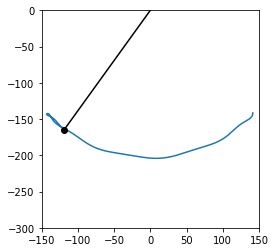

In [17]:
import time
from IPython import display

for ii in np.arange(0,900):
    plt.plot(y[0:ii], -x[0:ii])
    plt.plot(y[ii], -x[ii], 'k.', markersize = 12)
    plt.plot([0, y[ii]], [0, -x[ii]], 'k')
    
    plt.xlim(-150, 150)
    plt.ylim(-300, 0)
    plt.gca().set_aspect('equal', 'box')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.00000001)
    plt.close()